In [1]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import seaborn as sns 
import matplotlib.pyplot as plt
import cufflinks as cf

cf.go_offline()
%matplotlib inline
plt.style.use('ggplot')

In [2]:
maths_data = pd.read_csv("student-mat.csv", sep = ';') #importing of dataset as maths_data
maths_data.head() #first five values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
maths_data.tail() #last five values

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [4]:
maths_data.shape

(395, 33)

* The maths dataset has 395 observations with 33 different columns

In [5]:
maths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

* Checking the datatype of all the columns and counting the number of null value present per column

In [6]:
objects = maths_data.select_dtypes(include = "object").columns
print (objects)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


* Finding the features with object datatype for later use

In [7]:
integers = maths_data.select_dtypes(include = "int64").columns
print (integers)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


* Finding the features with integer datatype for later use

In [8]:
maths_data['G1'].describe() #Getting destriptive statistics

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

* The average grade of all the students in maths seems to be 10.4 

In [9]:
maths_data.corr()['G3'].sort_values() #looking for highly correlated features

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

* Since G1, G2 are highly correlated to G3 in compared to other features we can assume that it is possible to predict student's future grade base on G1 and G2

# Analysis

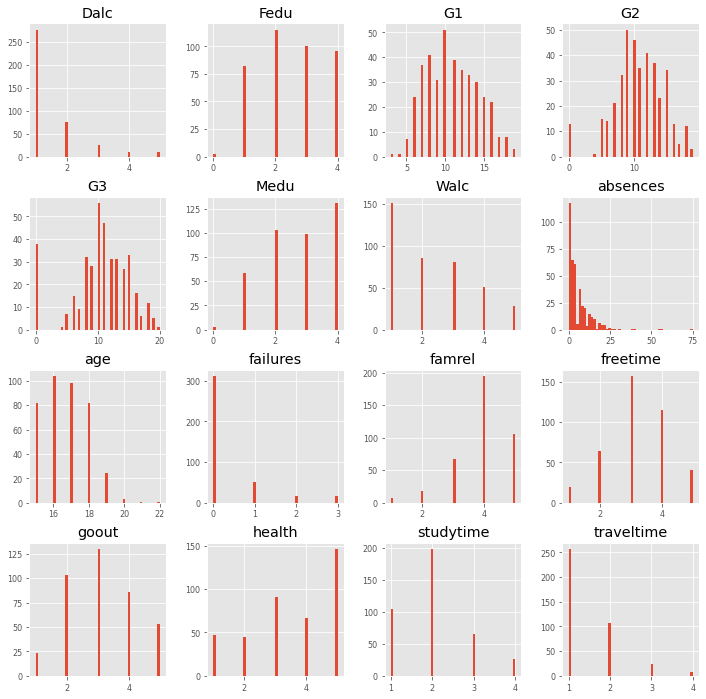

In [10]:
maths_data.hist(figsize=(12, 12), bins=50, xlabelsize=8, ylabelsize=8);

## Student's Grade Analysis 

In [11]:
(np.mean(maths_data['G1']), np.mean(maths_data['G2']), np.mean(maths_data['G3']))

(10.90886075949367, 10.713924050632912, 10.415189873417722)

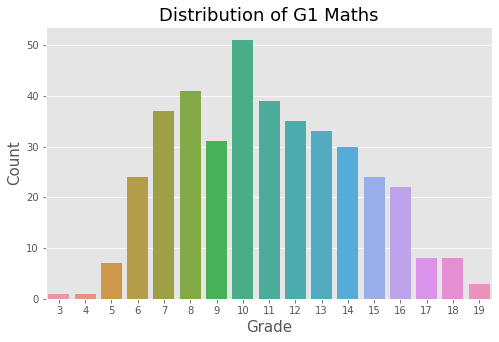

In [12]:
# maths_data['G1'].iplot(kind='hist',bins=50, title="Distribution of G1 Maths", xTitle='Grade',yTitle='Count')
fig =  plt.subplots(figsize=(8,5))
mat = sns.countplot(x =maths_data['G1']);
mat.axes.set_title('Distribution of G1 Maths', fontsize = 18);
mat.set_xlabel('Grade', fontsize = 15);
mat.set_ylabel('Count', fontsize = 15);
plt.show()

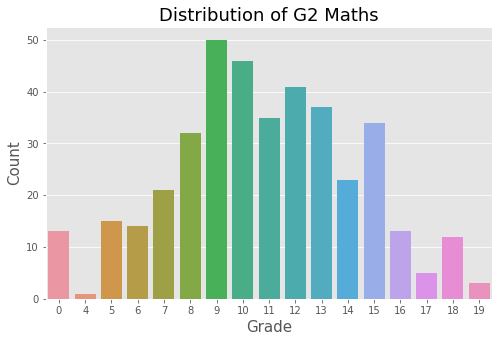

In [13]:
# maths_data['G2'].iplot(kind='hist',bins=50, title="Distribution of G2 on Maths", xTitle='Grade',yTitle='Count')
fig =  plt.subplots(figsize=(8,5))
mat = sns.countplot(x =maths_data['G2']);
mat.axes.set_title('Distribution of G2 Maths', fontsize = 18);
mat.set_xlabel('Grade', fontsize = 15);
mat.set_ylabel('Count', fontsize = 15);
plt.show()

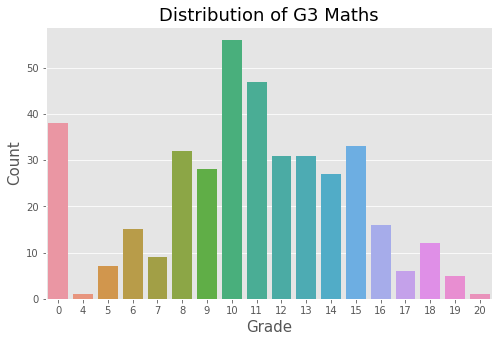

In [14]:
# maths_data['G3'].iplot(kind='hist',bins=50, title="Distribution of Final grade on Maths", xTitle='Grade',yTitle='Count')
fig =  plt.subplots(figsize=(8,5))
mat = sns.countplot(x =maths_data['G3']);
mat.axes.set_title('Distribution of G3 Maths', fontsize = 18);
mat.set_xlabel('Grade', fontsize = 15);
mat.set_ylabel('Count', fontsize = 15);
plt.show()

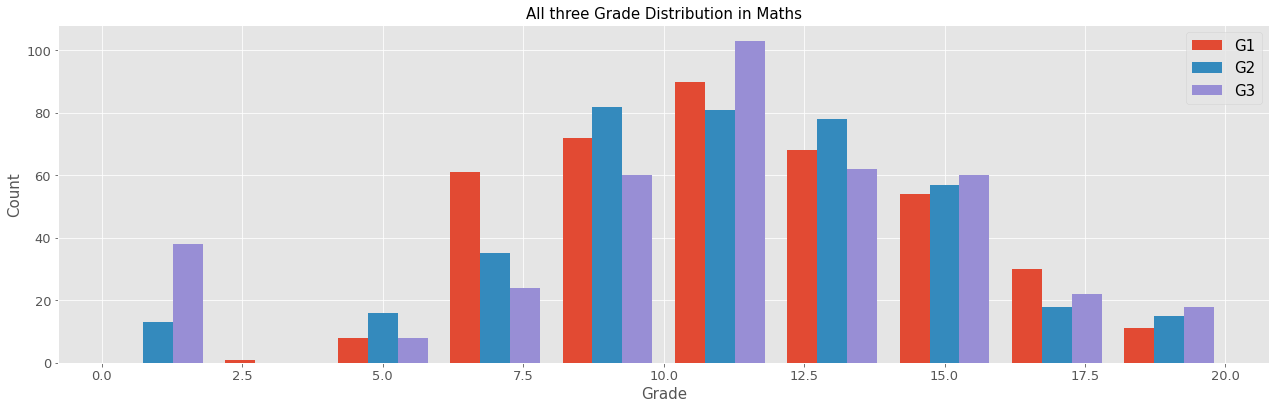

In [15]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18,6))
n_bins = 10

grade_maths = [maths_data['G1'],maths_data['G2'],maths_data['G3']]
ax.hist(grade_maths, n_bins, histtype='bar', label = ['G1','G2','G3'])
ax.legend(prop={'size': 15})
ax.set_title('All three Grade Distribution in Maths',fontsize = 15)
ax.set_xlabel('Grade', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
fig.tight_layout(pad=2)
ax.tick_params(axis='both', labelsize=13)
plt.show()

In [16]:
(maths_data['G3'] == 0).value_counts()

False    357
True      38
Name: G3, dtype: int64

* In Grade Distribution of maths we can see the decreasing trend in final grade (G3) which is probablly due to the total number of students receiving 0 i.e 38. 

## Student's Sex Analysis 

In [17]:
maths_data['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

* There are total of 208 female and 187 male

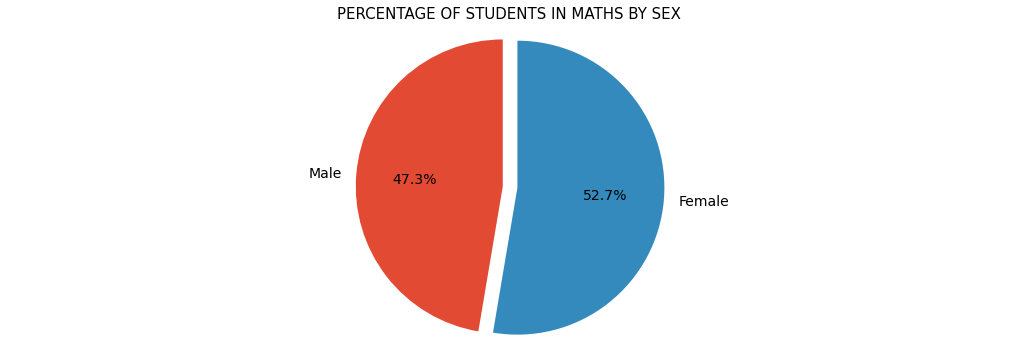

In [18]:
plt.style.use('ggplot')
size = [187,208]
labels = 'Male', 'Female'
explode = [0, 0.1]
fig, (axes2) =  plt.subplots(figsize=(18,6))
axes2.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90, textprops={'fontsize': 14})
axes2.axis('equal')
axes2.set_title("PERCENTAGE OF STUDENTS IN MATHS BY SEX", fontsize = 15)
plt.show()

* About 47.3% of student in our dataset are male where as the rest of 52.7% of them are Female

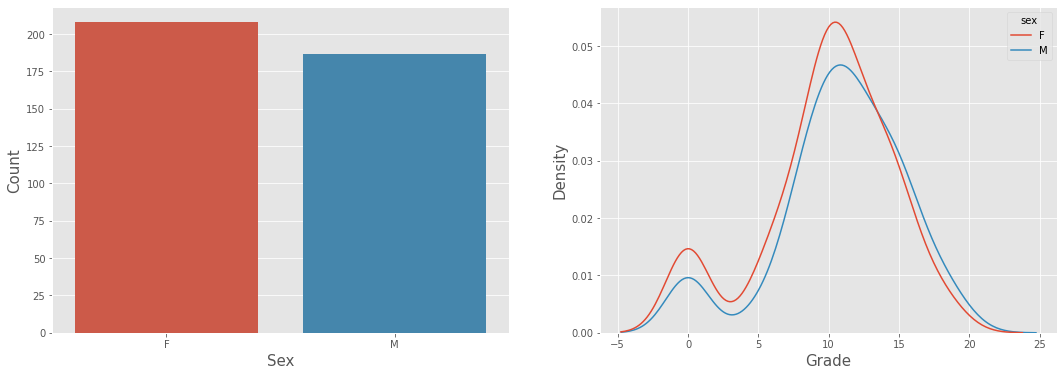

In [19]:
plt.style.use('ggplot')
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(18,6))

hist = sns.countplot(x = maths_data['sex'],ax = axes[0])
hist.set_xlabel('Sex', fontsize = 15)
hist.set_ylabel('Count', fontsize = 15)

a = sns.kdeplot(data=maths_data, x="G3", hue="sex",ax = axes[1])
a.set_xlabel('Grade', fontsize = 15)
a.set_ylabel('Density', fontsize = 15)
plt.show()

* From the above plots we can conclude that the gende distributions of students present in our dataset is pretty much even

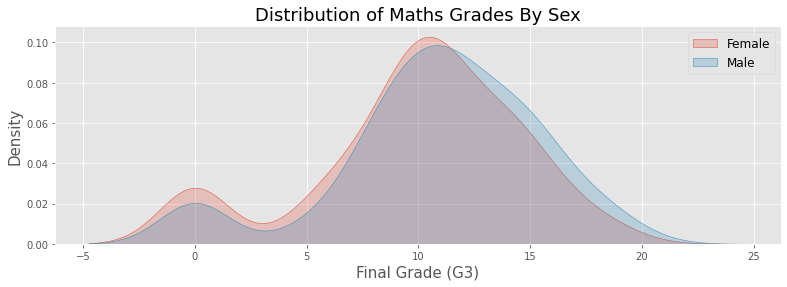

In [20]:
plt.style.use('ggplot')
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(maths_data.loc[maths_data['sex'] == 'F', 'G3'], label='Female', shade = True)
sns.kdeplot(maths_data.loc[maths_data['sex'] == 'M', 'G3'], label='Male', shade = True)
plt.title('Distribution of Maths Grades By Sex',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* The final grade(G3) distribution for both male and female seems to be same, concluding that both male and female perform equally well on their Final exams of Maths.

## Age Analysis of Student's

In [21]:
maths_data['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

* The no. of students present in the age group 20-22 seems to be pretty low.

In [22]:
maths_data['age'].iplot(kind='hist',bins=15, title="Final Grade Distribution of Student By Age",
                        xTitle='Age',yTitle='Count')

In [23]:
maths_data.iplot(kind='scatter',x='age',y='G3',mode='markers',size=8, 
                    title="Distribution of Final Grade based on age", xTitle='Age',yTitle='Final Grade')  

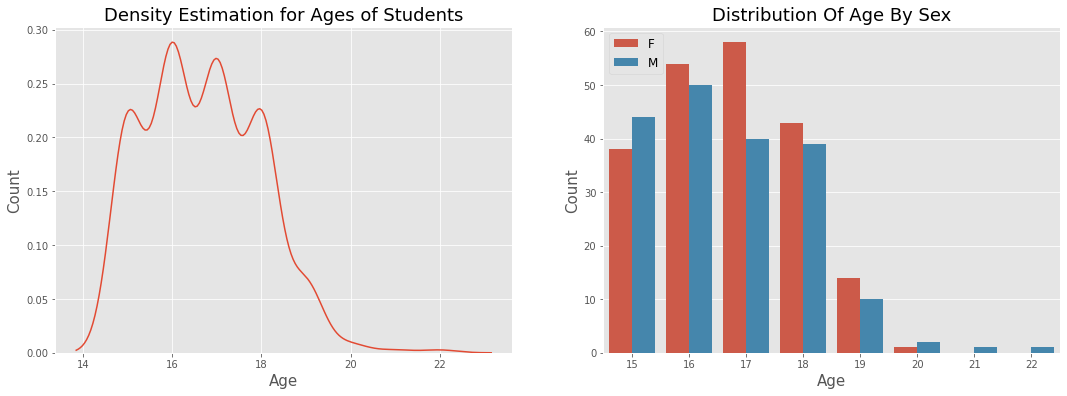

In [24]:
plt.style.use('ggplot')
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(18,6))

kd = sns.kdeplot(maths_data['age'],ax = axes[0])    
kd.axes.set_title('Density Estimation for Ages of Students', fontsize = 18)
kd.set_xlabel('Age', fontsize = 15)
kd.set_ylabel('Count', fontsize = 15)

b = sns.countplot(x=maths_data['age'],hue=maths_data['sex'],ax = axes[1])
b.axes.set_title('Distribution Of Age By Sex', fontsize = 18)
b.set_xlabel("Age", fontsize = 15)
b.set_ylabel("Count", fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

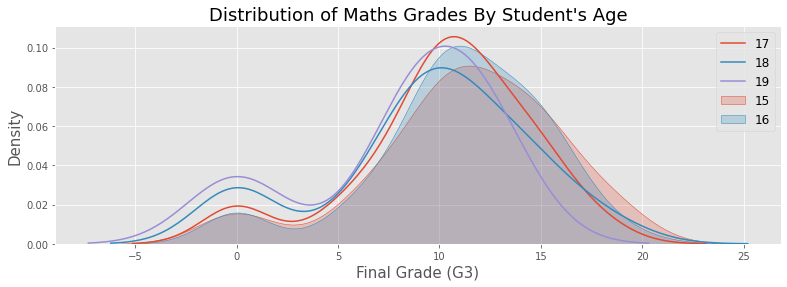

In [25]:
fig =  plt.subplots(figsize=(13,4))

sns.kdeplot(maths_data.loc[maths_data['age'] == 15, 'G3'], label='15', shade = True)
sns.kdeplot(maths_data.loc[maths_data['age'] == 16, 'G3'], label='16', shade = True)
sns.kdeplot(maths_data.loc[maths_data['age'] == 17, 'G3'], label='17', shade = False)
sns.kdeplot(maths_data.loc[maths_data['age'] == 18, 'G3'], label='18', shade = False)
sns.kdeplot(maths_data.loc[maths_data['age'] == 19, 'G3'], label='19', shade = False)

plt.title('Distribution of Maths Grades By Student\'s Age',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [26]:
a = maths_data.loc[maths_data['age'] == 15, 'G3']
b = maths_data.loc[maths_data['age'] == 16, 'G3']
c = maths_data.loc[maths_data['age'] == 17, 'G3']
d = maths_data.loc[maths_data['age'] == 18, 'G3']
e = maths_data.loc[maths_data['age'] == 19, 'G3']

print("The average Maths Grade of Student Based on Their Age")
print("15 : " , a.mean())
print("16 : " , b.mean())
print("17 : " , c.mean())
print("18 : " , d.mean())
print("20 : " , e.mean())

The average Maths Grade of Student Based on Their Age
15 :  11.25609756097561
16 :  11.028846153846153
17 :  10.275510204081632
18 :  9.548780487804878
20 :  8.208333333333334


* It seems that students of age group 15 and 16 outperforms others. 
* The gender distribution on each age group seems to be pretty much even, while the age ranges from 15-19, There also seems to be some outlers for the age 20,21,22 (failed students)

## Student living In Urabn and Rural Area

In [27]:
maths_data['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

* There are 307 people living in urban area where as 88 are in Rural area
* About 77%  of total students lives in Urban region

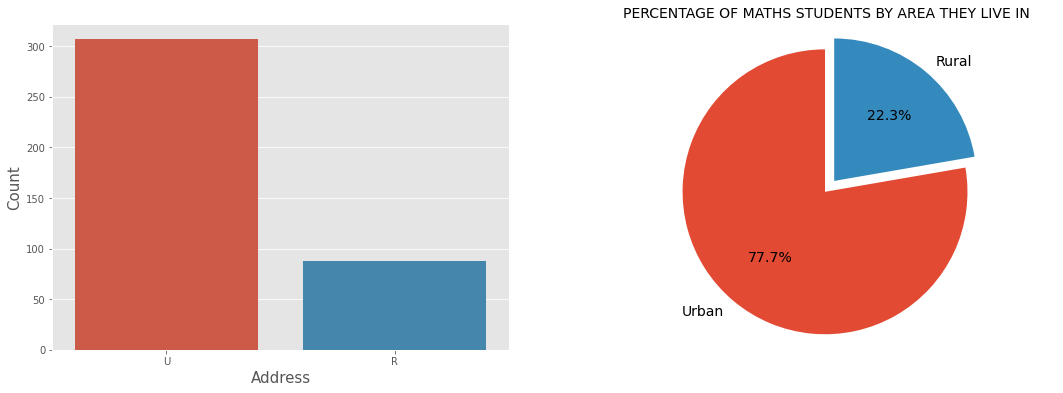

In [28]:
plt.style.use('ggplot')

size = [307,88]
labels = 'Urban', 'Rural'
explode = [0, 0.1]

fig, (axes1,axes2) =  plt.subplots(nrows=1, ncols=2, figsize=(18,6))
hist = sns.countplot(x = maths_data['address'], ax=axes1 )
# hist.axes.set_title('Students Living In  ', fontsize = 20)
hist.set_xlabel('Address', fontsize = 15)
hist.set_ylabel('Count', fontsize = 15);

axes2.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90, textprops={'fontsize': 14})
axes2.axis('equal')
axes2.set_title("PERCENTAGE OF MATHS STUDENTS BY AREA THEY LIVE IN ", fontsize = 14)

plt.show()

* The graphs above clarely states that there is a huge number of students living in Urban area

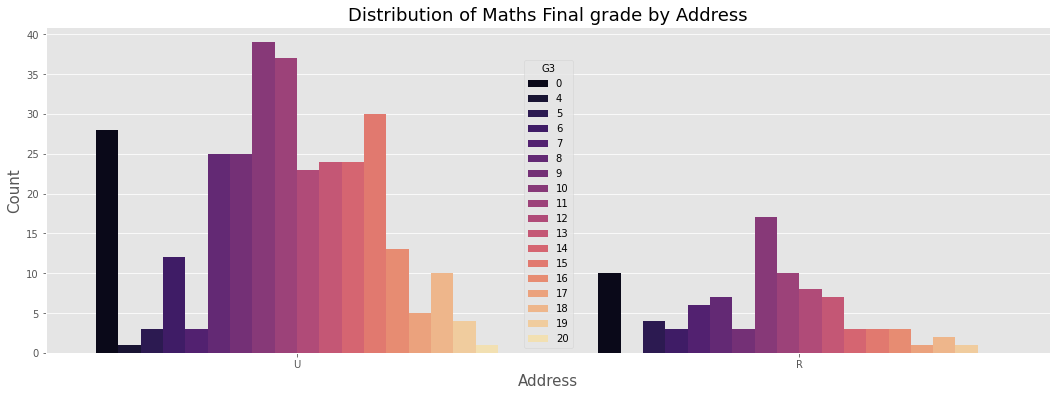

In [29]:
plt.style.use('ggplot')
fig, axes =  plt.subplots(figsize=(18,6))

a = sns.countplot(x=maths_data['address'],hue=maths_data['G3'],palette='magma')
a.axes.set_title('Distribution of Maths Final grade by Address', fontsize = 18)
a.set_xlabel('Address', fontsize = 15)
a.set_ylabel('Count', fontsize = 15)
plt.show()

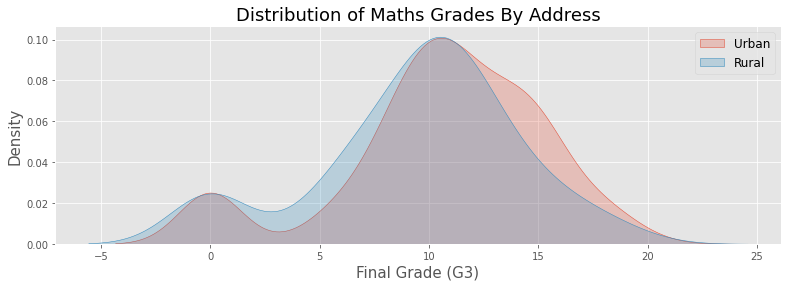

In [30]:
plt.style.use('ggplot')
fig=  plt.subplots(figsize=(13,4))
sns.kdeplot(maths_data.loc[maths_data['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(maths_data.loc[maths_data['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Distribution of Maths Grades By Address',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* From the above plot we can reach a conclusion that the students living in Urban region seems to perform comparatively better then the students living in the Rural areas.

In [31]:
u = maths_data.loc[maths_data['address'] == 'U', 'G3']
r = maths_data.loc[maths_data['address'] == 'R', 'G3']
print("The average Maths Grade of Student")
print("Urban : " , u.mean())
print("Rural : " , r.mean())

The average Maths Grade of Student
Urban :  10.674267100977199
Rural :  9.511363636363637


* We can see the average maths grade of students living in Urban area is higher than that of rural area 

## Student's Analysis Based on School

In [32]:
maths_data['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

* The no.of students studying maths from 'Mousinho da Silveira HS' is comparatively very low in compare to 'Gabriel Pereira HS'.

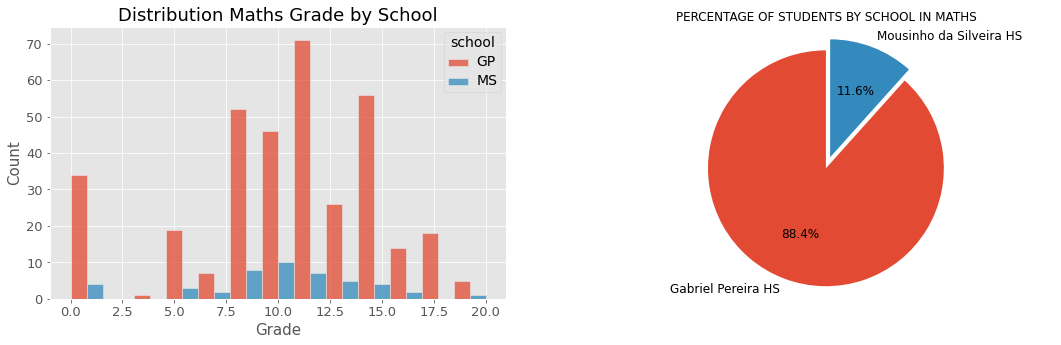

In [33]:
plt.style.use('ggplot')

size = [349,46]
labels = 'Gabriel Pereira HS', 'Mousinho da Silveira HS'
explode = [0, 0.1]

fig, (axes1,axes2) =  plt.subplots(nrows=1, ncols=2, figsize=(18,5))
mat = sns.histplot(x = maths_data['G3'],hue =maths_data['school'] , multiple="dodge", ax=axes1)
mat.axes.set_title('Distribution Maths Grade by School', fontsize = 18)
mat.set_xlabel('Grade', fontsize = 15)
mat.set_ylabel('Count', fontsize = 15)
mat.tick_params(axis='both', labelsize=13)

axes2.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90,  textprops={'fontsize': 12})
axes2.axis('equal')
axes2.set_title("PERCENTAGE OF STUDENTS BY SCHOOL IN MATHS", fontsize = 12)

plt.setp(axes1.get_legend().get_texts(), fontsize='14')
plt.setp(axes1.get_legend().get_title(), fontsize='14')
plt.show()

*  About 11.6% of student in our dataset are from "Mousinho da Silveira HS" where as the rest of 88.4% of them are from "Gabriel Pereira HS"

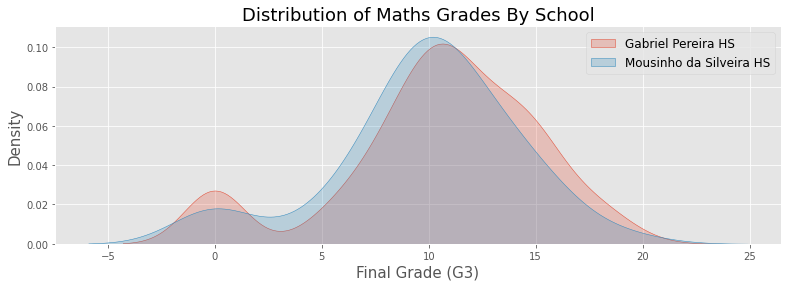

In [34]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(maths_data.loc[maths_data['school'] == 'GP', 'G3'], label='Gabriel Pereira HS', shade = True)
sns.kdeplot(maths_data.loc[maths_data['school'] == 'MS', 'G3'], label='Mousinho da Silveira HS', shade = True)
plt.title('Distribution of Maths Grades By School',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* Between two schools 'Gabriel Pereira HS' and 'Mousinho da Silveira HS' the distribution of maths grade is similar. 
* We can also see the plots for 'Distribution of Maths Grades By School' and 'Distribution of Maths Grades By Address' lining up with one anonther, concluding that the 'Gabriel Pereira HS' is present in Urban area where as 'Mousinho da Silveira HS' is present in rural area

## Analysis Based on Student's StudyTime

In [35]:
maths_data['studytime'].value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

*Weekly Study Time*
* 1 = below 2 hours 
* 2 = 2 to 5 hours
* 3 = 5 to 10 hours
* 4 = above 10 hours

It seems that the number of students reading 2 to 5 hr a week and below 2 hr a week are higher.

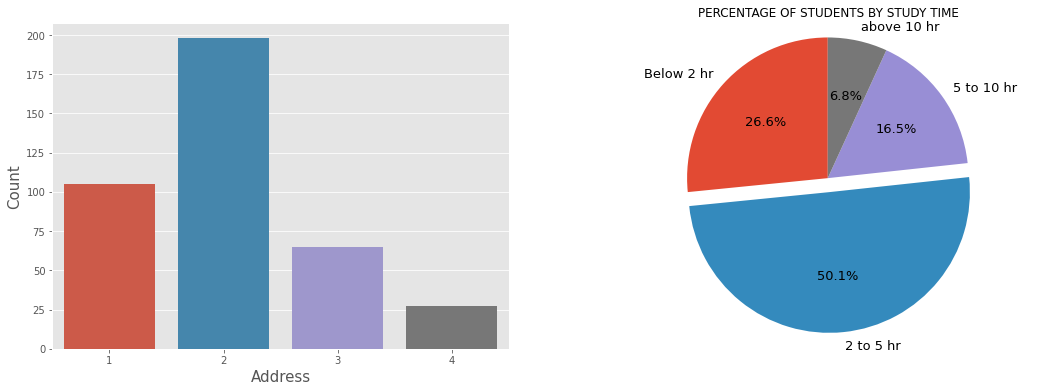

In [36]:
size = [105,198,65,27]
labels = 'Below 2 hr','2 to 5 hr', '5 to 10 hr', 'above 10 hr'
explode = [0, 0.1, 0, 0]

fig, (axes1,axes2) =  plt.subplots(nrows=1, ncols=2, figsize=(18,6))
hist = sns.countplot(x = maths_data['studytime'], ax=axes1 )
# hist.axes.set_title('Students Living In  ', fontsize = 20)
hist.set_xlabel('Address', fontsize = 15)
hist.set_ylabel('Count', fontsize = 15);

axes2.pie(size, labels = labels, explode = explode, autopct = '%1.1f%%', startangle = 90,  textprops={'fontsize': 13})
axes2.axis('equal')
axes2.set_title("PERCENTAGE OF STUDENTS BY STUDY TIME", fontsize = 12)
plt.show()

* 50% of students seems to commit a studytime of 2-5hr a week.  

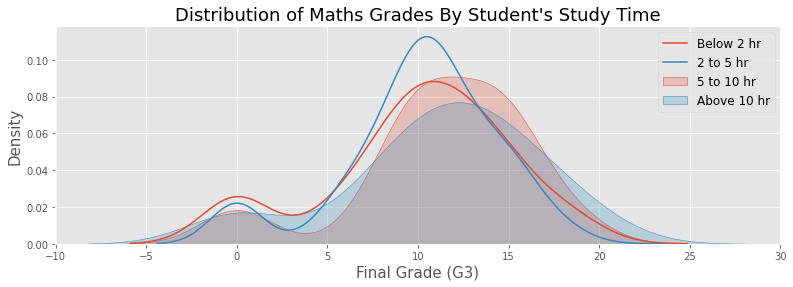

In [37]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(maths_data.loc[maths_data['studytime'] == 1, 'G3'], label='Below 2 hr', shade = False)
sns.kdeplot(maths_data.loc[maths_data['studytime'] == 2, 'G3'], label='2 to 5 hr', shade = False)
sns.kdeplot(maths_data.loc[maths_data['studytime'] == 3, 'G3'], label='5 to 10 hr', shade = True)
sns.kdeplot(maths_data.loc[maths_data['studytime'] == 4, 'G3'], label='Above 10 hr', shade = True)

plt.title('Distribution of Maths Grades By Student\'s Study Time',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* We see that the students who commit more then 5 hr a week for on their studies seems to perform comparatively well then other students with less then 5 hr a week

In [38]:
maths_data['studytime'].corr(maths_data['G3']) #identifying the correlation

0.0978196896531963

*There seems is a positive correlation between Final grade G3 and studytime of student even though they dont seem to be strongly related we can reach a conclusion that when studytime increase the Final Grade increases too*.

## Grade Analysis By Father's Education

In [39]:
maths_data['Fedu'].value_counts()

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

*Father Education*
* 0 = None
* 1 = Primary Education
* 2 = 5 to 9th Grade
* 3 = Secondary Education
* 4 = Higher Education

It seems that the parents who have received higher education is higher*Mother Education*r

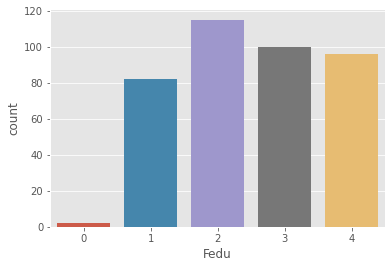

In [40]:
ax = sns.countplot(x="Fedu", data=maths_data)

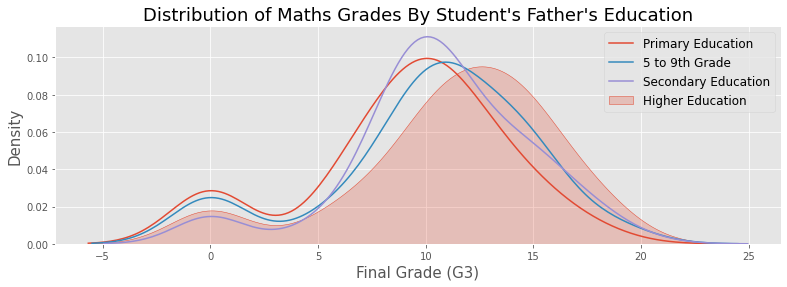

In [41]:
fig =  plt.subplots(figsize=(13,4))
# sns.kdeplot(maths_data.loc[maths_data['Fedu'] == 0, 'G3'], label='None', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Fedu'] == 1, 'G3'], label='Primary Education', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Fedu'] == 2, 'G3'], label='5 to 9th Grade', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Fedu'] == 3, 'G3'], label='Secondary Education', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Fedu'] == 4, 'G3'], label='Higher Education', shade = True)

plt.title('Distribution of Maths Grades By Student\'s Father\'s Education',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [42]:
n = maths_data.loc[maths_data['Fedu'] == 0, 'G3']
p = maths_data.loc[maths_data['Fedu'] == 1, 'G3']
f = maths_data.loc[maths_data['Fedu'] == 2, 'G3']
s = maths_data.loc[maths_data['Fedu'] == 3, 'G3']
h = maths_data.loc[maths_data['Fedu'] == 4, 'G3']

print("The average Maths Grade of Student Based on Father's Education ")
print("Primary Education : " , p.mean())
print("5 to 9th Grade : " , f.mean())
print("Secondary Education : " , s.mean())
print("Higher Education : " , h.mean())

The average Maths Grade of Student Based on Father's Education 
Primary Education :  9.158536585365853
5 to 9th Grade :  10.26086956521739
Secondary Education :  10.66
Higher Education :  11.364583333333334


## Grade Analysis By Mother Education

In [43]:
maths_data['Medu'].value_counts()

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

*Mother Education*
* 0 = None
* 1 = Primary Education
* 2 = 5 to 9th Grade
* 3 = Secondary Education
* 4 = Higher Education

It seems that the parents who have received higher education is higher

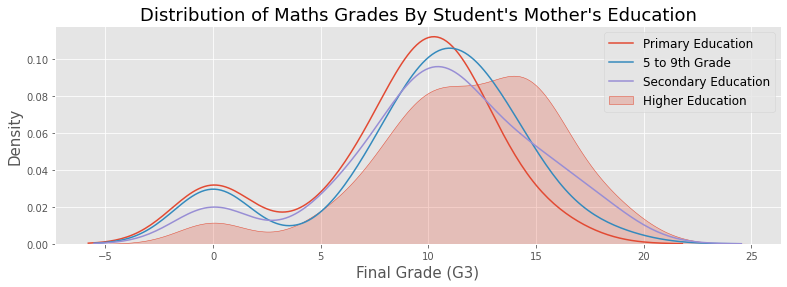

In [44]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(maths_data.loc[maths_data['Medu'] == 1, 'G3'], label='Primary Education', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Medu'] == 2, 'G3'], label='5 to 9th Grade', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Medu'] == 3, 'G3'], label='Secondary Education', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Medu'] == 4, 'G3'], label='Higher Education', shade = True)

plt.title('Distribution of Maths Grades By Student\'s Mother\'s Education',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

* The students whose parents have received higher education seems to perform well in the Final exam.

In [45]:
n = maths_data.loc[maths_data['Medu'] == 0, 'G3']
p = maths_data.loc[maths_data['Medu'] == 1, 'G3']
f = maths_data.loc[maths_data['Medu'] == 2, 'G3']
s = maths_data.loc[maths_data['Medu'] == 3, 'G3']
h = maths_data.loc[maths_data['Medu'] == 4, 'G3']

print("The average Maths Grade of Student Based on Mother's Education ")
print("Primary Education : " , p.mean())
print("5 to 9th Grade : " , f.mean())
print("Secondary Education : " , s.mean())
print("Higher Education : " , h.mean())

The average Maths Grade of Student Based on Mother's Education 
Primary Education :  8.677966101694915
5 to 9th Grade :  9.728155339805825
Secondary Education :  10.303030303030303
Higher Education :  11.763358778625955


* We can conclude that the student's parents who have received higher education performs better then other students in final exam.

## Grade Analysis By Father's Job

In [46]:
maths_data['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

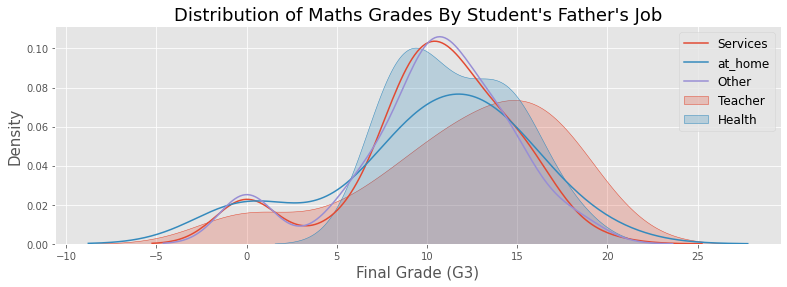

In [47]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(maths_data.loc[maths_data['Fjob'] == 'teacher', 'G3'], label='Teacher', shade = True)
sns.kdeplot(maths_data.loc[maths_data['Fjob'] == 'health', 'G3'], label='Health', shade = True)
sns.kdeplot(maths_data.loc[maths_data['Fjob'] == 'services', 'G3'], label='Services', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Fjob'] == 'at_home', 'G3'], label='at_home', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Fjob'] == 'other', 'G3'], label='Other', shade = False)

plt.title('Distribution of Maths Grades By Student\'s Father\'s Job',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [48]:
n = maths_data.loc[maths_data['Fjob'] == 'teacher', 'G3']
p = maths_data.loc[maths_data['Fjob'] == 'health', 'G3']
f = maths_data.loc[maths_data['Fjob'] == 'services', 'G3']
s = maths_data.loc[maths_data['Fjob'] == 'at_home', 'G3']
h = maths_data.loc[maths_data['Fjob'] == 'other', 'G3']

print("The average Maths Grade of Student Based on Father's Education ")
print("Teacher : " , n.mean())
print("Health : " , p.mean())
print("Services : " , f.mean())
print("at_home : " , s.mean())
print("Others : " , h.mean())

The average Maths Grade of Student Based on Father's Education 
Teacher :  11.96551724137931
Health :  11.61111111111111
Services :  10.297297297297296
at_home :  10.15
Others :  10.193548387096774


* The students whose father are teacher seems to perform better then other students in the finals 

## Grade Analysis By Mother's Job

In [49]:
maths_data['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

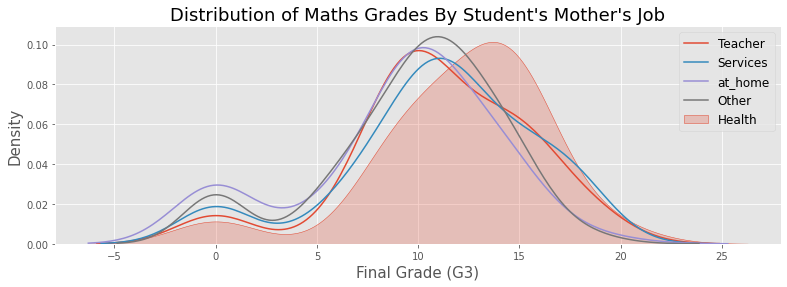

In [50]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(maths_data.loc[maths_data['Mjob'] == 'teacher', 'G3'], label='Teacher', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Mjob'] == 'health', 'G3'], label='Health', shade = True)
sns.kdeplot(maths_data.loc[maths_data['Mjob'] == 'services', 'G3'], label='Services', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Mjob'] == 'at_home', 'G3'], label='at_home', shade = False)
sns.kdeplot(maths_data.loc[maths_data['Mjob'] == 'other', 'G3'], label='Other', shade = False)

plt.title('Distribution of Maths Grades By Student\'s Mother\'s Job',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [51]:
n = maths_data.loc[maths_data['Mjob'] == 'teacher', 'G3']
p = maths_data.loc[maths_data['Mjob'] == 'health', 'G3']
f = maths_data.loc[maths_data['Mjob'] == 'services', 'G3']
s = maths_data.loc[maths_data['Mjob'] == 'at_home', 'G3']
h = maths_data.loc[maths_data['Mjob'] == 'other', 'G3']

print("The average Maths Grade of Student Based on Father's Education ")
print("Teacher : " , n.mean())
print("Health : " , p.mean())
print("Services : " , f.mean())
print("at_home : " , s.mean())
print("Others : " , h.mean())

The average Maths Grade of Student Based on Father's Education 
Teacher :  11.051724137931034
Health :  12.147058823529411
Services :  11.019417475728156
at_home :  9.152542372881356
Others :  9.822695035460994


* The students whose mother works at health related job seems to perform much better then that of others. 

## Grade Analysis Based On How Frequently Student Goes Out

In [52]:
maths_data['goout'].value_counts()

3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64

*Goes Out*
* 1 = Very Low
* 2 = Low
* 3 = Medium
* 4 = High
* 5 = Very High


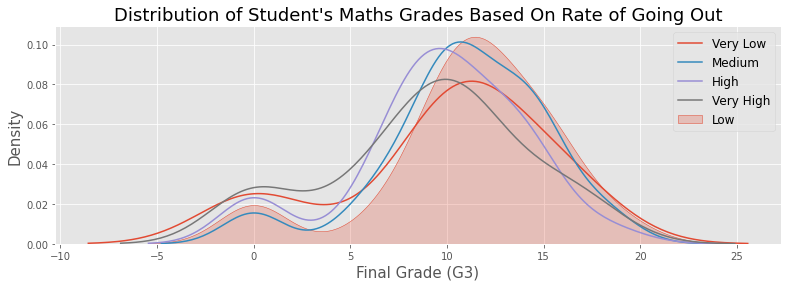

In [53]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(maths_data.loc[maths_data['goout'] == 1, 'G3'], label='Very Low', shade = False)
sns.kdeplot(maths_data.loc[maths_data['goout'] == 2, 'G3'], label='Low', shade = True)
sns.kdeplot(maths_data.loc[maths_data['goout'] == 3, 'G3'], label='Medium', shade = False)
sns.kdeplot(maths_data.loc[maths_data['goout'] == 4, 'G3'], label='High', shade = False)
sns.kdeplot(maths_data.loc[maths_data['goout'] == 5, 'G3'], label='Very High', shade = False)

plt.title('Distribution of Student\'s Maths Grades Based On Rate of Going Out',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [54]:
e = maths_data.loc[maths_data['goout'] == 5, 'G3']
a = maths_data.loc[maths_data['goout'] == 1, 'G3']
b = maths_data.loc[maths_data['goout'] == 2, 'G3']
c = maths_data.loc[maths_data['goout'] == 3, 'G3']
d = maths_data.loc[maths_data['goout'] == 4, 'G3']

print("The average Maths Grade of Student Based on Their Rate of Going Out ")
print("Very Low : " , a.mean())
print("Low : " , b.mean())
print("Medium : " , c.mean())
print("High : " , d.mean())
print("Very High : " , e.mean())

The average Maths Grade of Student Based on Their Rate of Going Out 
Very Low :  9.869565217391305
Low :  11.194174757281553
Medium :  10.961538461538462
High :  9.651162790697674
Very High :  9.037735849056604


* The students who have low rate of going out seems to perform well on final exams. 

## Grade Analysis By Family Relationship

In [55]:
maths_data['famrel'].value_counts()

4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64

*Family Relationship*
* 1 = Very bad
* 2 = Bad
* 3 = Good
* 4 = Very Good
* 5 = Excellent


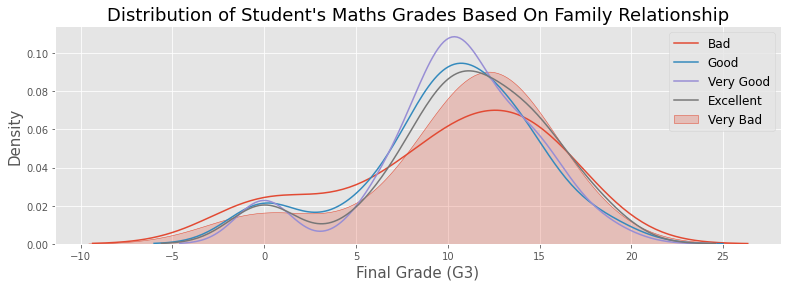

In [56]:
fig =  plt.subplots(figsize=(13,4))
sns.kdeplot(maths_data.loc[maths_data['famrel'] == 1, 'G3'], label='Very Bad', shade = True)
sns.kdeplot(maths_data.loc[maths_data['famrel'] == 2, 'G3'], label='Bad', shade = False)
sns.kdeplot(maths_data.loc[maths_data['famrel'] == 3, 'G3'], label='Good', shade = False)
sns.kdeplot(maths_data.loc[maths_data['famrel'] == 4, 'G3'], label='Very Good', shade = False)
sns.kdeplot(maths_data.loc[maths_data['famrel'] == 5, 'G3'], label='Excellent', shade = False)

plt.title('Distribution of Student\'s Maths Grades Based On Family Relationship',  fontsize = 18)
plt.xlabel('Final Grade (G3)', fontsize = 15);
plt.ylabel('Density', fontsize = 15)
plt.legend(prop={'size': 12})
plt.show()

In [57]:
e = maths_data.loc[maths_data['famrel'] == 5, 'G3']
a = maths_data.loc[maths_data['famrel'] == 1, 'G3']
b = maths_data.loc[maths_data['famrel'] == 2, 'G3']
c = maths_data.loc[maths_data['famrel'] == 3, 'G3']
d = maths_data.loc[maths_data['famrel'] == 4, 'G3']

print("The average Maths Grade of Student Based Family Relationship ")
print("Very Low : " , a.mean())
print("Low : " , b.mean())
print("Medium : " , c.mean())
print("High : " , d.mean())
print("Very High : " , e.mean())

The average Maths Grade of Student Based Family Relationship 
Very Low :  10.625
Low :  9.88888888888889
Medium :  10.044117647058824
High :  10.35897435897436
Very High :  10.830188679245284


* The grade of student with the worst family is higher in maths 
(May be due to the less amount of data present in the Bad family relation)

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for x in objects:
    maths_data[x] = encoder.fit_transform(maths_data[x].astype(str))
maths_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int32
 16  famsup      395 non-null    int32
 17  paid        395 non-null    int32
 18  activities  395 non-null    int32
 19  nursery     395 non-null    int32
 20  higher      395 non-null    int3

* Directing all the features values in between 0 and n_classes-1

# Feature Selection

## Univariation Selection

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [60]:
a = maths_data.iloc[:,0:32]   #getting all the columns except the target column
b = maths_data.iloc[:,-1]     #getting the G3 column

#selecting top 15 features and then obtaining their score alogn with columns
univariation_selected_features = SelectKBest(score_func = chi2, k = 15)
fit = univariation_selected_features.fit(a,b)
columns = pd.DataFrame(a.columns)
univariation_score = pd.DataFrame(fit.scores_)
f_score = pd.concat([columns, univariation_score], axis = 1)

f_score.columns = ['Features', 'Score']
print(f_score.nlargest(15,'Score'))

     Features       Score
29   absences  648.166848
31         G2  451.680952
30         G1  319.716427
14   failures  140.934898
10     reason   29.724125
27       Walc   28.444167
15  schoolsup   28.319018
22   romantic   20.089526
26       Dalc   17.082868
17       paid   16.129900
8        Mjob   14.807099
6        Medu   13.894852
4     famsize   12.429690
1         sex   10.581662
25      goout   10.472494


* Using Chi-square selecting of 15 best features for students grade prediction

## Feature Importance 

In [61]:
from sklearn.ensemble import ExtraTreesClassifier

In [62]:
# Using of extra tree classifier to obtain the top 15 features
ex_tree_classifier = ExtraTreesClassifier()
ex_tree_classifier.fit(a,b)
#An inbuilt class 
print(ex_tree_classifier.feature_importances_)

[0.01230998 0.02458157 0.03578617 0.01916927 0.02470203 0.01390109
 0.03548578 0.03277385 0.03446509 0.03065493 0.03308556 0.02322962
 0.02542085 0.03050623 0.02134225 0.01326435 0.02323666 0.02281432
 0.02554401 0.01815211 0.00541994 0.01785668 0.02032471 0.03184623
 0.03300748 0.03438214 0.02285812 0.03588073 0.03645345 0.04922941
 0.08050581 0.13180956]


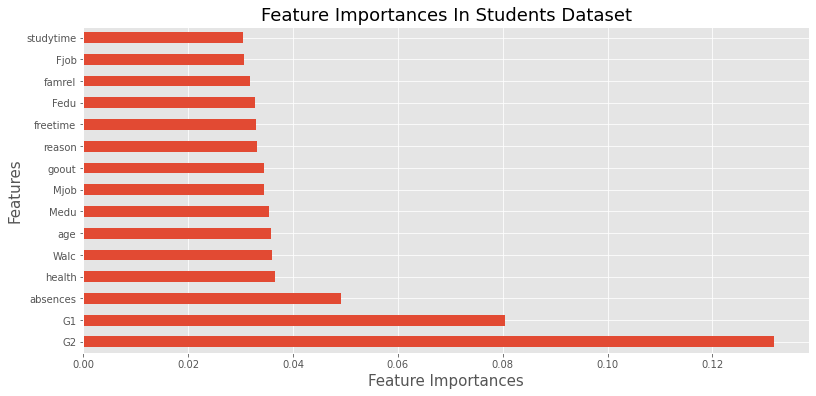

In [63]:
feature_importance = pd.Series(ex_tree_classifier.feature_importances_, index = a.columns)
fig =  plt.subplots(figsize=(13,6))
feature_importance.nlargest(15).plot(kind = 'barh')
plt.title('Feature Importances In Students Dataset',  fontsize = 18)
plt.xlabel('Feature Importances', fontsize = 15);
plt.ylabel('Features', fontsize = 15)
plt.show()

* Plotting the chart displaying the top 15 important features present in the dataset with an inbuilt class (Feature Importance) using Extra Tree Classifier 

In [64]:
feature_importance

school        0.012310
sex           0.024582
age           0.035786
address       0.019169
famsize       0.024702
Pstatus       0.013901
Medu          0.035486
Fedu          0.032774
Mjob          0.034465
Fjob          0.030655
reason        0.033086
guardian      0.023230
traveltime    0.025421
studytime     0.030506
failures      0.021342
schoolsup     0.013264
famsup        0.023237
paid          0.022814
activities    0.025544
nursery       0.018152
higher        0.005420
internet      0.017857
romantic      0.020325
famrel        0.031846
freetime      0.033007
goout         0.034382
Dalc          0.022858
Walc          0.035881
health        0.036453
absences      0.049229
G1            0.080506
G2            0.131810
dtype: float64

## Correlation

In [65]:
maths_data.corr()['G3'].sort_values() #looking for highly correlated features

failures     -0.360415
age          -0.161579
goout        -0.132791
romantic     -0.129970
traveltime   -0.117142
schoolsup    -0.082788
guardian     -0.070109
health       -0.061335
Pstatus      -0.058009
Dalc         -0.054660
Walc         -0.051939
school       -0.045017
famsup       -0.039157
freetime      0.011307
activities    0.016100
absences      0.034247
Fjob          0.042286
famrel        0.051363
nursery       0.051568
famsize       0.081407
studytime     0.097820
internet      0.098483
paid          0.101996
Mjob          0.102082
sex           0.103456
address       0.105756
reason        0.121994
Fedu          0.152457
higher        0.182465
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

* Identifying all the features which are correlated with Final Grade after the use of Label Encoder

In [66]:
top_correlated = maths_data.corr().abs()['G3'].sort_values(ascending = False)
top_correlated[:16].index

Index(['G3', 'G2', 'G1', 'failures', 'Medu', 'higher', 'age', 'Fedu', 'goout',
       'romantic', 'reason', 'traveltime', 'address', 'sex', 'Mjob', 'paid'],
      dtype='object')

* Keeping track of top 15 highly correlated features

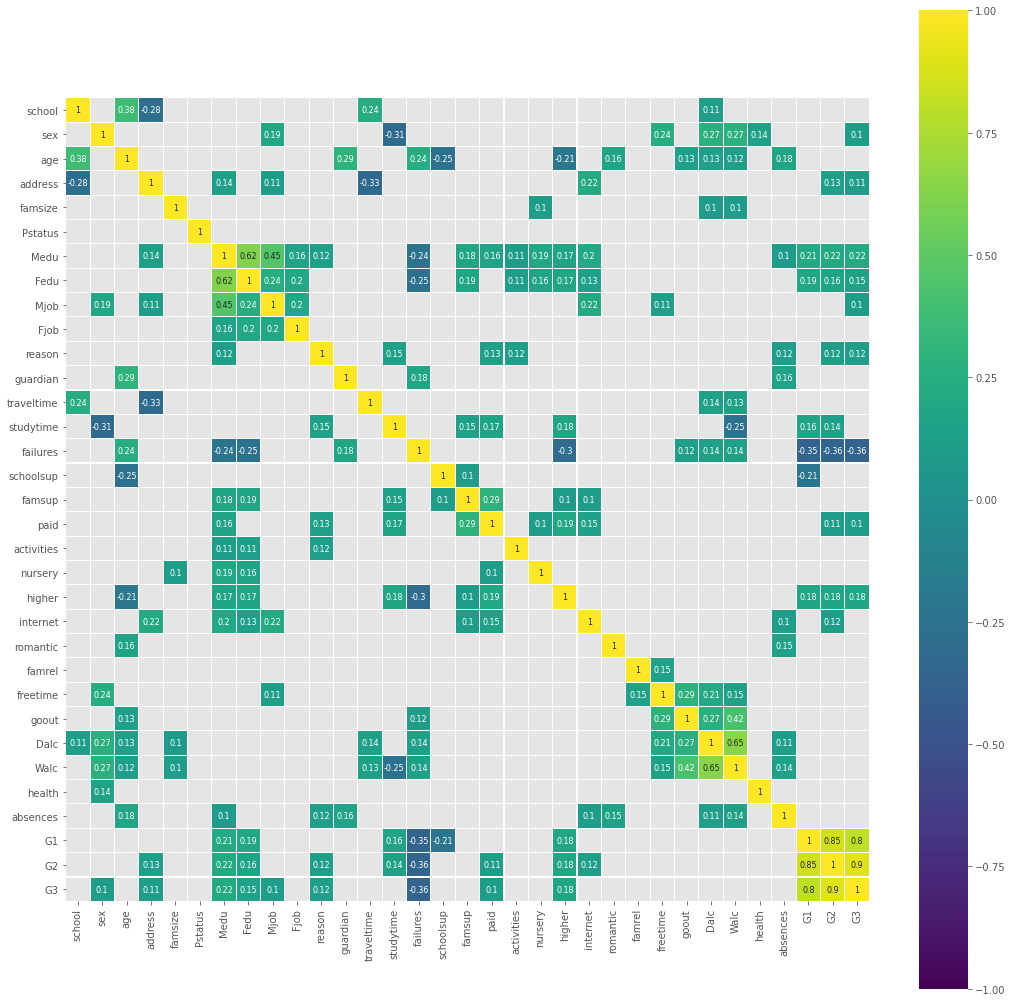

In [67]:
plt.figure(figsize=(18, 18))
correlated = maths_data.corr()
sns.heatmap(correlated[(correlated >= 0.10) | (correlated <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Machine Learning Algorithms

## Training and Testing Set

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics

In [69]:
# Univeriance Selection
features = f_score.nlargest(5,'Score')
columns = np.array(features['Features'])
X = (maths_data[columns])
X.columns

Index(['absences', 'G2', 'G1', 'failures', 'reason'], dtype='object')

In [70]:
#Using Feature Importance
columns = ['G2', 'G1', 'absences', 'age', 'health']
X2 = (maths_data[columns])
X2.columns

Index(['G2', 'G1', 'absences', 'age', 'health'], dtype='object')

In [71]:
#Using Correlation
columns = ['G2', 'G1', 'failures', 'Medu', 'higher']
X3 = (maths_data[columns])
X3.columns

Index(['G2', 'G1', 'failures', 'Medu', 'higher'], dtype='object')

In [72]:
Y = maths_data.G3
Y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.25, random_state=42)

In [74]:
print('Shape of Training Features:', X_train.shape)
print('Shape of Training Labels:', y_train.shape)
print('Shape of Testing Features:', X_test.shape)
print('Shape of Training Labels:', y_test.shape)

Shape of Training Features: (296, 5)
Shape of Training Labels: (296,)
Shape of Testing Features: (99, 5)
Shape of Training Labels: (99,)


## Training Model

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import svm
from sklearn import tree
from io import StringIO  
from IPython.display import Image 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

## Supervised Learning

### Random Forest

In [76]:
def random_forest_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Random Forest" + '\033[0m')
    
    list = [X,X2,X3]
    
    rf_train_scores = []
    rf_test_scores = []
    rf_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
        random_forest.fit(X_train, y_train);
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"
            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print('\033[1m\033[4m' + "\n" + "Train Test Split"+ '\033[0m')
        print("\nTraining Accuracy : ",random_forest.score(X_train,y_train))
        print("Testing Accuracy : ", random_forest.score(X_test,y_test))
        print("")
       
        #Testing 
        predictions = random_forest.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list) 
        print("")
        
        #5-fold Cross validation
        print('\033[1m\033[4m' + "\n" + "Cross Validation"+ '\033[0m')
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(random_forest, h,Y,scoring='r2',cv = folds)
        cross_pred = cross_val_predict(random_forest, h,Y,cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(Y, cross_pred, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(Y, cross_pred, squared=False))
        print("R2-Score : ", r2_score(Y, cross_pred))
        
        #Creating Accuracy Dataframe
        rf_train_scores.append(random_forest.score(X_train,y_train))
        rf_test_scores.append(random_forest.score(X_test,y_test))
        rf_cv_scores.append(sum(value) / len(value))
        
        rf_scores_list = {'Training Score' :rf_train_scores , 'Testing Score' : rf_test_scores, 
                        'Cross Validation Score' :rf_cv_scores}
        rf_score_df = pd.DataFrame(rf_scores_list)
        
    return random_forest,rf_score_df,metrics_list_df

random_forest, rf_score_df,metrics_list_df = random_forest_model(X,X2,X3,Y)

Random Forest

 Univeriant Selection 

Train Test Split

Training Accuracy :  0.9746637666266561
Testing Accuracy :  0.8381859820569685

 Predicted Grade  Final Grade
            8.42           10
           11.53           12
            6.50            5
            9.58           10
            9.35            9


Metrics
Mean Square Error :  3.7278476040637543
Root Mean Square Error :  1.9307634769861777
R2-Score :  0.8381859820569685


Cross Validation
Fold- 1 = 0.7916547591168521
Fold- 2 = 0.8690753444543785
Fold- 3 = 0.8902514296545954
Fold- 4 = 0.9020615683062774
Fold- 5 = 0.7244120112151566

Cross Validation Average: 0.8354910225494521 


Metrics
Mean Square Error :  3.323698915684211
Root Mean Square Error :  1.8231014551264586
R2-Score :  0.8412484231930589

 Feature Importance 

Train Test Split

Training Accuracy :  0.9856755395448075
Testing Accuracy :  0.8804636556330105

 Predicted Grade  Final Grade
            8.44           10
           11.88           12
          

In [77]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=rf_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=rf_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=rf_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Feature Selection Technique Scores For Random Forest", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

In [78]:
rf_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
rf_score_df = rf_score_df.set_index('Feature Selection')
rf_score_df

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.974664,0.838186,0.835491
Feature Importance,0.985676,0.880464,0.878834
Correlation,0.934576,0.779478,0.778283


In [79]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df = metrics_list_df.set_index('Feature Selection')
metrics_list_df

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,3.727848,1.930763,0.838186
Feature Importance,2.753861,1.659476,0.880464
Correlation,5.080363,2.253966,0.779478


### Random Forest Hyper Parameter Tuning

In [80]:
def random_forest_model_hyper_parameterTuning(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Random Forest" + '\033[0m')
    
    list = [X,X2,X3]
    
    rf_train_scores = []
    rf_test_scores = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        
        n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
        max_features = ['auto', 'sqrt']
        max_depth = [2,4]
        min_samples_split = [2, 5]
        min_samples_leaf = [1, 2]
        bootstrap = [True, False]

        param_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
                      'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

        f = RandomForestRegressor()
        random_forest = GridSearchCV(estimator = f, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        random_forest.fit(X_train, y_train)        
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"
            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print('\033[1m\033[4m' + "\n" + "Train Test Split"+ '\033[0m')
        print("\nTraining Accuracy : ",random_forest.score(X_train,y_train))
        print("Testing Accuracy : ", random_forest.score(X_test,y_test))
        print("")
        
        #Creating Accuracy Dataframe
        rf_train_scores.append(random_forest.score(X_train,y_train))
        rf_test_scores.append(random_forest.score(X_test,y_test))
        
        rf_scores_list = {'Training Score' :rf_train_scores , 'Testing Score' : rf_test_scores}
        rf_score_df2 = pd.DataFrame(rf_scores_list)
        
    return rf_score_df2, random_forest
        
rf_score_df2, random_forest_hyper_parameter = random_forest_model_hyper_parameterTuning(X,X2,X3,Y)

Random Forest
Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 516 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   11.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Univeriant Selection 

Train Test Split

Training Accuracy :  0.9118412319274812
Testing Accuracy :  0.8631819264667884

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 576 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 953 out of 960 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   10.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Feature Importance 

Train Test Split

Training Accuracy :  0.9232411806254618
Testing Accuracy :  0.8840805059595115

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 576 tasks      | elapsed:    7.6s



 Correlation 

Train Test Split

Training Accuracy :  0.8557862353371241
Testing Accuracy :  0.7974851150135013



[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   11.4s finished


In [81]:
print("The set of best parameters selected are:")
random_forest_hyper_parameter.best_params_

The set of best parameters selected are:


{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 48}

In [82]:
rf_score_df2 ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
rf_score_df2 = rf_score_df2.set_index('Feature Selection')
rf_score_df2

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.911841,0.863182
Feature Importance,0.923241,0.884081
Correlation,0.855786,0.797485


In [83]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=rf_score_df2.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=rf_score_df2.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=rf_score_df2.iloc[2])
])
fig.update_layout(template='ggplot2',title = "Random Forest Score After Hyperparameter Tuning", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

In [84]:
def hyper_parameter_tuning(model, f_score, Y):
    hyper_parameters = [{'n_features_to_select' : list(range(1,15))}]
    folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
    rfe = RFE(model)
    model_cross_val = GridSearchCV(estimator = rfe, param_grid = hyper_parameters,scoring= 'r2',cv = folds, 
                                            verbose = 1,return_train_score=True);
    f = f_score.nlargest(15,'Score')
    c = np.array(f['Features'])
    par = (maths_data[c])
    par.columns
    X_train, X_test, y_train, y_test = train_test_split(par, Y, test_size=0.25, random_state=42)
    model_cross_val.fit(X_train,y_train)
    return model_cross_val

def optimal_feature_plot(random_forest_cross_val_res):
    fig =  plt.subplots(figsize=(13,4))
    plt.plot(random_forest_cross_val_res["param_n_features_to_select"],random_forest_cross_val_res["mean_test_score"])
    plt.plot(random_forest_cross_val_res["param_n_features_to_select"],random_forest_cross_val_res["mean_train_score"])
    plt.title('Optimal Number of Features',  fontsize = 18)
    plt.xlabel('Number of Features', fontsize = 15);
    plt.ylabel('R-Score', fontsize = 15)
    plt.legend(['Test score', 'Train Score'],prop={'size': 12})
    plt.show()

In [85]:
random_forest_hyper_para = hyper_parameter_tuning(random_forest,f_score,Y)
random_forest_cross_val_res = pd.DataFrame(random_forest_hyper_para.cv_results_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  1.2min finished


In [86]:
random_forest_cross_val_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.712826,0.050376,0.006579,0.000796,1,{'n_features_to_select': 1},0.814232,0.850140,0.868394,0.830460,...,0.812805,0.058894,14,0.831474,0.823992,0.815889,0.827958,0.861814,0.832225,0.015678
1,1.574791,0.030250,0.006582,0.000488,2,{'n_features_to_select': 2},0.845734,0.915995,0.876998,0.859280,...,0.853280,0.048568,3,0.907117,0.893424,0.903552,0.904984,0.922426,0.906301,0.009336
2,1.531902,0.044116,0.007380,0.001832,3,{'n_features_to_select': 3},0.873915,0.817695,0.898959,0.772693,...,0.824149,0.055148,13,0.951234,0.942569,0.953651,0.977190,0.961877,0.957304,0.011693
3,1.435158,0.060704,0.006981,0.000631,4,{'n_features_to_select': 4},0.843944,0.869099,0.900745,0.808847,...,0.839749,0.043828,10,0.970661,0.963852,0.979002,0.986346,0.981015,0.976175,0.007964
4,1.335836,0.037498,0.008383,0.002803,5,{'n_features_to_select': 5},0.875375,0.842897,0.879907,0.813460,...,0.838213,0.037973,11,0.980498,0.980036,0.984472,0.986607,0.981976,0.982718,0.002485


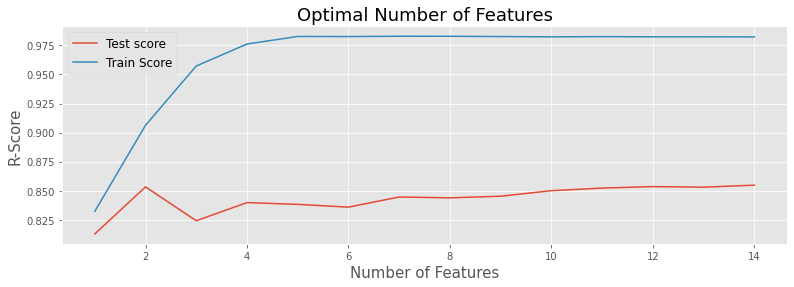

In [87]:
optimal_feature_plot(random_forest_cross_val_res)

### Linear Regression

In [88]:
def linear_regression_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Linear Regression" + '\033[0m')
    
    list = [X,X2,X3]
    
    lr_train_scores = []
    lr_test_scores = []
    lr_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        linear_regression = LinearRegression()
        linear_regression.fit(X_train, y_train);

        
        if j == "Univeriant Selection":
            
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",linear_regression.score(X_train,y_train))
        print("Testing Accuracy : ", linear_regression.score(X_test,y_test))
        print("")
        
    
        #Testing 
        predictions = linear_regression.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
    
        #5-fold Cross validation
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(linear_regression, X_train,y_train,scoring='r2',cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list)           
        
        #Creating Accuracy Dataframe
        lr_train_scores.append(linear_regression.score(X_train,y_train))
        lr_test_scores.append(linear_regression.score(X_test,y_test))
        lr_cv_scores.append(sum(value) / len(value))
        
        lr_scores_list = {'Training Score' :lr_train_scores , 'Testing Score' : lr_test_scores, 
                        'Cross Validation Score' :lr_cv_scores}
        lr_score_df = pd.DataFrame(lr_scores_list)
        
    return linear_regression,lr_score_df,metrics_list_df

linear_regression, lr_score_df,metrics_list_df = linear_regression_model(X,X2,X3,Y)

Linear Regression

 Univeriant Selection 

Training Accuracy :  0.8318147325591885
Testing Accuracy :  0.8152902910864155

 Predicted Grade  Final Grade
        6.331340           10
       12.070014           12
        3.652916            5
        8.505437           10
        8.166228            9

Fold- 1 = 0.8313119290382995
Fold- 2 = 0.844162553466455
Fold- 3 = 0.8678006682748995
Fold- 4 = 0.825952960982373
Fold- 5 = 0.746095344144648

Cross Validation Average: 0.8230646911813351 


Metrics
Mean Square Error :  4.255315173393928
Root Mean Square Error :  2.0628415289095594
R2-Score :  0.8152902910864155

 Feature Importance 

Training Accuracy :  0.8330190205104337
Testing Accuracy :  0.8190991473818736

 Predicted Grade  Final Grade
        7.045531           10
       11.768772           12
        3.425026            5
        8.429459           10
        7.964776            9

Fold- 1 = 0.8374763929111813
Fold- 2 = 0.8392213592797458
Fold- 3 = 0.862584638569399
Fold- 4 = 0.

In [89]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=lr_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=lr_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=lr_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Feature Selection Technique Scores For Linear Regression", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [90]:
lr_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
lr_score_df.set_index('Feature Selection')

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.831815,0.815290,0.823065
Feature Importance,0.833019,0.819099,0.825694
Correlation,0.827150,0.812493,0.822377


In [91]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df.set_index('Feature Selection')

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,4.255315,2.062842,0.815290
Feature Importance,4.167567,2.041462,0.819099
Correlation,4.319753,2.078402,0.812493


#### Linear Regression Hyper Parameter Tuning

In [92]:
def linear_regression_model_hyper_parameterTuning(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Linear Regression" + '\033[0m')
    
    list = [X,X2,X3]
    
    lr_train_scores = []
    lr_test_scores = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)        
        param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
        lr_model = LinearRegression()
        linear_regression= GridSearchCV(estimator = lr_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        linear_regression.fit(X_train, y_train)

        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"
            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print('\033[1m\033[4m' + "\n" + "Train Test Split"+ '\033[0m')
        print("\nTraining Accuracy : ",linear_regression.score(X_train,y_train))
        print("Testing Accuracy : ", linear_regression.score(X_test,y_test))
        print("")       
    
        #Creating Accuracy Dataframe
        lr_train_scores.append(linear_regression.score(X_train,y_train))
        lr_test_scores.append(linear_regression.score(X_test,y_test))
        lr_scores_list = {'Training Score' :lr_train_scores , 'Testing Score' : lr_test_scores}
        lr_score_df2 = pd.DataFrame(lr_scores_list)
        
    return linear_regression,lr_score_df2

linear_regression_hyper_parameter, lr_score_df2 = linear_regression_model_hyper_parameterTuning(X,X2,X3,Y)

Linear Regression
Fitting 3 folds for each of 8 candidates, totalling 24 fits

 Univeriant Selection 

Train Test Split

Training Accuracy :  0.8318147325591885
Testing Accuracy :  0.8152902910864155

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Feature Importance 

Train Test Split

Training Accuracy :  0.8325959432463147
Testing Accuracy :  0.8202624534308085

Fitting 3 folds for each of 8 candidates, totalling 24 fits

 Correlation 

Train Test Split

Training Accuracy :  0.8271502887425943
Testing Accuracy :  0.812493250007124



[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:    0.0s finished


In [93]:
print("The set of best parameters selected are:")
linear_regression_hyper_parameter.best_params_

The set of best parameters selected are:


{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [94]:
lr_score_df2 ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
lr_score_df2 = lr_score_df2.set_index('Feature Selection')
lr_score_df2

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.831815,0.815290
Feature Importance,0.832596,0.820262
Correlation,0.827150,0.812493


In [95]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=lr_score_df2.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=lr_score_df2.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=lr_score_df2.iloc[2])
])
fig.update_layout(template='ggplot2',title = "Linear Regression Score After Hyperparameter Tuning", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

In [96]:
linear_regression_hyper_para = hyper_parameter_tuning(linear_regression,f_score,Y)
linear_regression_cross_val_res = pd.DataFrame(linear_regression_hyper_para.cv_results_)
linear_regression_cross_val_res.head()

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.0s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019548,0.005300,0.002992,9.344062e-07,1,{'n_features_to_select': 1},0.825335,0.839494,0.877882,0.830697,...,0.819832,0.050509,5,0.819296,0.814918,0.803909,0.818097,0.847243,0.820693,0.014343
1,0.016156,0.000977,0.002594,4.885193e-04,2,{'n_features_to_select': 2},0.822243,0.840380,0.875300,0.830682,...,0.819622,0.048542,6,0.821800,0.816792,0.806668,0.821875,0.848205,0.823068,0.013735
2,0.015557,0.000487,0.002792,3.984934e-04,3,{'n_features_to_select': 3},0.816684,0.841320,0.873484,0.832967,...,0.819138,0.047686,8,0.826087,0.818257,0.808797,0.823031,0.849425,0.825119,0.013488
3,0.012566,0.001739,0.002593,4.878383e-04,4,{'n_features_to_select': 4},0.820762,0.844688,0.871075,0.836660,...,0.820347,0.048700,3,0.826546,0.820690,0.817267,0.823396,0.850518,0.827684,0.011820
4,0.013165,0.002129,0.002593,4.887141e-04,5,{'n_features_to_select': 5},0.830635,0.838588,0.874287,0.830956,...,0.821610,0.046862,1,0.830912,0.821491,0.818240,0.830579,0.852455,0.830735,0.011945


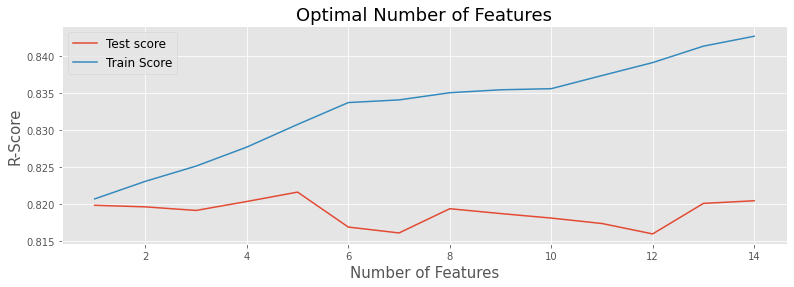

In [97]:
optimal_feature_plot(linear_regression_cross_val_res)

### Support Vector Machine (SVM)

In [98]:
def svm_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Support Vector Machine" + '\033[0m')
    
    list = [X,X2,X3]
    
    svm_train_scores = []
    svm_test_scores = []
    svm_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        model_SVM = svm.SVC(kernel='linear');
        model_SVM.fit(X_train, y_train);

        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",model_SVM.score(X_train,y_train))
        print("Testing Accuracy : ", model_SVM.score(X_test,y_test))
        print("")
        
    
        #Testing 
        predictions = model_SVM.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
    
        #5-fold Cross validation
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(model_SVM, X_train,y_train,scoring='r2',cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list)
        
        
        #Creating Accuracy Dataframe
        svm_train_scores.append(model_SVM.score(X_train,y_train))
        svm_test_scores.append(model_SVM.score(X_test,y_test))
        svm_cv_scores.append(sum(value) / len(value))
        
        svm_scores_list = {'Training Score' :svm_train_scores , 'Testing Score' : svm_test_scores, 
                        'Cross Validation Score' :svm_cv_scores}
        svm_score_df = pd.DataFrame(svm_scores_list)
        
    return model_SVM,svm_score_df,metrics_list_df

model_SVM, svm_score_df,metrics_list_df = svm_model(X,X2,X3,Y)

Support Vector Machine

 Univeriant Selection 

Training Accuracy :  0.6317567567567568
Testing Accuracy :  0.5050505050505051

 Predicted Grade  Final Grade
               7           10
              12           12
               5            5
              10           10
               9            9

Fold- 1 = 0.7901704225592384
Fold- 2 = 0.7116377720398377
Fold- 3 = 0.6987007785315542
Fold- 4 = 0.8135409002742291
Fold- 5 = 0.7367158481221626

Cross Validation Average: 0.7501531443054044 


Metrics
Mean Square Error :  4.555555555555555
Root Mean Square Error :  2.1343747458109497
R2-Score :  0.802257810216392

 Feature Importance 

Training Accuracy :  0.652027027027027
Testing Accuracy :  0.48484848484848486

 Predicted Grade  Final Grade
               8           10
              12           12
               5            5
              10           10
               9            9

Fold- 1 = 0.7113563861546597
Fold- 2 = 0.9036201717868999
Fold- 3 = 0.8545197386537161
Fold

In [99]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=svm_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=svm_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=svm_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Feature Selection Technique Scores For Support Vector Machine", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [100]:
svm_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
svm_score_df.set_index('Feature Selection')

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.631757,0.505051,0.750153
Feature Importance,0.652027,0.484848,0.814772
Correlation,0.594595,0.434343,0.730416


In [101]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df.set_index('Feature Selection')

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,4.555556,2.134375,0.802258
Feature Importance,3.181818,1.783765,0.861887
Correlation,6.666667,2.581989,0.710621


#### Support Vector Machine Hyper Parameter Tuning

In [102]:
def svm_model_hyper_parameterTuning(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Support Vector Machine" + '\033[0m')
    
    list = [X,X2,X3]
    
    svm_train_scores = []
    svm_test_scores = []
    svm_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        
        param_grid = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
        svm_model = svm.SVC()
        model_SVM = GridSearchCV(estimator = svm_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        model_SVM.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",model_SVM.score(X_train,y_train))
        print("Testing Accuracy : ", model_SVM.score(X_test,y_test))
        print("") 
        
        #Creating Accuracy Dataframe
        svm_train_scores.append(model_SVM.score(X_train,y_train))
        svm_test_scores.append(model_SVM.score(X_test,y_test))
        
        svm_scores_list = {'Training Score' :svm_train_scores , 'Testing Score' : svm_test_scores}
        svm_score_df = pd.DataFrame(svm_scores_list)
        
    return model_SVM,svm_score_df

model_SVM_hyper_parameter, svm_score_df = svm_model_hyper_parameterTuning(X,X2,X3,Y)

Support Vector Machine
Fitting 3 folds for each of 4 candidates, totalling 12 fits

 Univeriant Selection 

Training Accuracy :  0.6317567567567568
Testing Accuracy :  0.5050505050505051

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Feature Importance 

Training Accuracy :  0.652027027027027
Testing Accuracy :  0.48484848484848486

Fitting 3 folds for each of 4 candidates, totalling 12 fits

 Correlation 

Training Accuracy :  0.5675675675675675
Testing Accuracy :  0.46464646464646464



[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    0.0s finished


In [103]:
print("The set of best parameters selected are:")
model_SVM_hyper_parameter.best_params_

The set of best parameters selected are:


{'C': 10, 'kernel': 'rbf'}

In [104]:
svm_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
svm_score_df = svm_score_df.set_index('Feature Selection')
svm_score_df

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.631757,0.505051
Feature Importance,0.652027,0.484848
Correlation,0.567568,0.464646


In [105]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=svm_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=svm_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=svm_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "Support Vector Machine Score After Hyperparameter Tuning", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

In [106]:
model_SVM_hyper_para = hyper_parameter_tuning(model_SVM,f_score,Y)
model_SVM_cross_val_res = pd.DataFrame(model_SVM_hyper_para.cv_results_)
model_SVM_cross_val_res.head()

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    6.4s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.140825,0.011409,0.002991,6.306763e-04,1,{'n_features_to_select': 1},0.724663,0.777705,0.820550,0.721791,...,0.750197,0.042647,1,0.760661,0.761592,0.728193,0.760624,0.767172,0.755648,0.013942
1,0.125671,0.016884,0.001994,8.869684e-07,2,{'n_features_to_select': 2},0.622307,0.800245,0.807257,0.720805,...,0.742184,0.067471,3,0.710232,0.779307,0.736612,0.773530,0.773812,0.754699,0.026944
2,0.117493,0.015192,0.002193,3.985930e-04,3,{'n_features_to_select': 3},0.622307,0.778482,0.830888,0.655692,...,0.705185,0.083584,9,0.742050,0.758391,0.658028,0.729769,0.766958,0.731039,0.038709
3,0.109108,0.013778,0.002188,3.863338e-04,4,{'n_features_to_select': 4},0.663249,0.743505,0.837535,0.687262,...,0.721631,0.064077,5,0.715835,0.713783,0.744816,0.773328,0.763317,0.742216,0.024184
4,0.110305,0.016422,0.002593,4.883638e-04,5,{'n_features_to_select': 5},0.598765,0.599713,0.855997,0.671477,...,0.661031,0.102424,14,0.709031,0.716130,0.787563,0.784017,0.776811,0.754710,0.034646


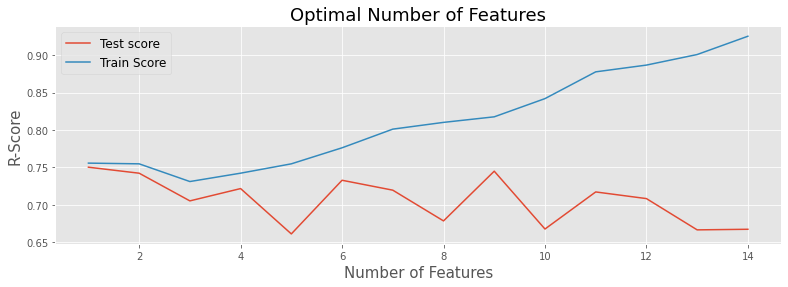

In [107]:
optimal_feature_plot(model_SVM_cross_val_res)

### Naive Bayes (Gaussian)

In [108]:
def naive_bayes_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Naive Bays" + '\033[0m')
    
    list = [X,X2,X3]
    
    nb_train_scores = []
    nb_test_scores = []
    nb_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        naive_bayes_gaussian = GaussianNB()
        naive_bayes_gaussian.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",naive_bayes_gaussian.score(X_train,y_train))
        print("Testing Accuracy : ", naive_bayes_gaussian.score(X_test,y_test))
        print("")
        
    
        #Testing 
        predictions = naive_bayes_gaussian.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
    
        #5-fold Cross validation
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(naive_bayes_gaussian, X_train,y_train,scoring='r2',cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list)
        
        #Creating Accuracy Dataframe
        nb_train_scores.append(naive_bayes_gaussian.score(X_train,y_train))
        nb_test_scores.append(naive_bayes_gaussian.score(X_test,y_test))
        nb_cv_scores.append(sum(value) / len(value))
        
        nb_scores_list = {'Training Score' :nb_train_scores , 'Testing Score' : nb_test_scores, 
                        'Cross Validation Score' :nb_cv_scores}
        nb_score_df = pd.DataFrame(nb_scores_list)
        
    return naive_bayes_gaussian,nb_score_df,metrics_list_df

naive_bayes_gaussian, nb_score_df,metrics_list_df = naive_bayes_model(X,X2,X3,Y)

Naive Bays

 Univeriant Selection 

Training Accuracy :  0.46621621621621623
Testing Accuracy :  0.3838383838383838

 Predicted Grade  Final Grade
               7           10
              12           12
               7            5
              10           10
               8            9

Fold- 1 = -0.18835189955475218
Fold- 2 = 0.6766612214786321
Fold- 3 = 0.26669086539665043
Fold- 4 = 0.2028626847702495
Fold- 5 = 0.5700706768468841

Cross Validation Average: 0.3055867097875328 


Metrics
Mean Square Error :  14.747474747474747
Root Mean Square Error :  3.8402440999856697
R2-Score :  0.3598589865098276

 Feature Importance 

Training Accuracy :  0.5743243243243243
Testing Accuracy :  0.41414141414141414

 Predicted Grade  Final Grade
               8           10
              13           12
               7            5
              10           10
               8            9

Fold- 1 = -0.31015541036182825
Fold- 2 = 0.5017784686726037
Fold- 3 = 0.32207675169599703
Fold- 

In [109]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=nb_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=nb_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=nb_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Features Selection Technique Score For Naive Bays ", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [110]:
nb_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
nb_score_df = nb_score_df.set_index('Feature Selection')
nb_score_df

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.466216,0.383838,0.305587
Feature Importance,0.574324,0.414141,0.092050
Correlation,0.358108,0.232323,0.610243


In [111]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df = metrics_list_df.set_index('Feature Selection')
metrics_list_df

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,14.747475,3.840244,0.359859
Feature Importance,16.282828,4.035199,0.293214
Correlation,6.141414,2.478188,0.733421


#### Naive Bayes Machine Hyper Parameter Tuning

In [112]:
def naive_bayes_model(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "Naive Bays" + '\033[0m')
    
    list = [X,X2,X3]
    
    nb_train_scores = []
    nb_test_scores = []
    nb_cv_scores = []  
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
       
        param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
        nb_model = GaussianNB()
        naive_bayes_gaussian = GridSearchCV(estimator = nb_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        naive_bayes_gaussian.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

            
        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",naive_bayes_gaussian.score(X_train,y_train))
        print("Testing Accuracy : ", naive_bayes_gaussian.score(X_test,y_test))
        print("")        
        
        #Creating Accuracy Dataframe
        nb_train_scores.append(naive_bayes_gaussian.score(X_train,y_train))
        nb_test_scores.append(naive_bayes_gaussian.score(X_test,y_test))
        
        nb_scores_list = {'Training Score' :nb_train_scores , 'Testing Score' : nb_test_scores}
        nb_score_df = pd.DataFrame(nb_scores_list)
        
    return naive_bayes_gaussian,nb_score_df

naive_bayes_gaussian_hyper_parameter, nb_score_df2 = naive_bayes_model(X,X2,X3,Y)

Naive Bays
Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.6s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Univeriant Selection 

Training Accuracy :  0.5675675675675675
Testing Accuracy :  0.47474747474747475

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.6s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Feature Importance 

Training Accuracy :  0.6047297297297297
Testing Accuracy :  0.4444444444444444

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.3s



 Correlation 

Training Accuracy :  0.5371621621621622
Testing Accuracy :  0.3838383838383838



[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.6s finished


In [113]:
print("The set of best parameters selected are:")
naive_bayes_gaussian_hyper_parameter.best_params_

The set of best parameters selected are:


{'var_smoothing': 0.02310129700083159}

In [114]:
nb_score_df2 ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
nb_score_df2 = nb_score_df2.set_index('Feature Selection')
nb_score_df2

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.567568,0.474747
Feature Importance,0.604730,0.444444
Correlation,0.537162,0.383838


In [115]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=svm_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=svm_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=svm_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "Support Vector Machine Score After Hyperparameter Tuning", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")

### k-nearest neighbors (KNN)

In [116]:
def knn(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "KNN" + '\033[0m')
    
    list = [X,X2,X3]
    
    knn_train_scores = []
    knn_test_scores = []
    knn_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        neigh = KNeighborsClassifier()
        neigh.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",neigh.score(X_train,y_train))
        print("Testing Accuracy : ", neigh.score(X_test,y_test))
        print("")
        
    
        ##Testing 
        predictions = neigh.predict(X_test)
        d = np.array(y_test)
        pred = {'Predicted Grade' :predictions , 'Final Grade' : d}
        df = pd.DataFrame(pred)
        print(df.iloc[:5].to_string(index = False)) 
        print("")  
    
        #5-fold Cross validation
        folds = KFold(n_splits = 5, shuffle = True, random_state = 42)    
        value = cross_val_score(neigh, X_train,y_train,scoring='r2',cv = folds)
        for p in range(len(value)):
            f = p +1
            print("Fold-",f, "=", value[p])
        print('\033[4m' + "\nCross Validation Average" + '\033[0m' + ":",sum(value) / len(value) , "\n")
        
        #Metrics Classification Report
        print('\033[4m' + "\nMetrics" + '\033[0m')
        print("Mean Square Error : ", mean_squared_error(d, predictions, squared=True))
        print("Root Mean Square Error : ", mean_squared_error(d, predictions, squared=False))
        print("R2-Score : ", r2_score(d, predictions))
        
        mse.append(mean_squared_error(d, predictions, squared=True))
        rmse.append(mean_squared_error(d, predictions, squared=False))
        r2.append(r2_score(d, predictions))
        metrics_list = {'MSE' :mse , 'RMSE' : rmse, 
                        'R2-score' :r2}
        metrics_list_df = pd.DataFrame(metrics_list)        
        
        #Creating Accuracy Dataframe
        knn_train_scores.append(neigh.score(X_train,y_train))
        knn_test_scores.append(neigh.score(X_test,y_test))
        knn_cv_scores.append(sum(value) / len(value))
        
        knn_scores_list = {'Training Score' :knn_train_scores , 'Testing Score' : knn_test_scores, 
                        'Cross Validation Score' :knn_cv_scores}
        knn_score_df = pd.DataFrame(knn_scores_list)
        
    return neigh,knn_score_df,metrics_list_df

neigh, knn_score_df,metrics_list_df = knn(X,X2,X3,Y)

KNN

 Univeriant Selection 

Training Accuracy :  0.597972972972973
Testing Accuracy :  0.45454545454545453

 Predicted Grade  Final Grade
               7           10
              12           12
               6            5
              10           10
               8            9

Fold- 1 = 0.7471809481567409
Fold- 2 = 0.6129261737893239
Fold- 3 = 0.5133426790497408
Fold- 4 = 0.6862751655407665
Fold- 5 = 0.867596987205943

Cross Validation Average: 0.6854643907485031 


Metrics
Mean Square Error :  5.363636363636363
Root Mean Square Error :  2.3159525823376357
R2-Score :  0.7671815902991223

 Feature Importance 

Training Accuracy :  0.6047297297297297
Testing Accuracy :  0.40404040404040403

 Predicted Grade  Final Grade
               8           10
              11           12
               6            5
              10           10
               8            9

Fold- 1 = 0.3868882103072382
Fold- 2 = 0.7932497233493176
Fold- 3 = 0.6278068440683906
Fold- 4 = 0.7799979934

In [117]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=knn_score_df.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=knn_score_df.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=knn_score_df.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Features Selection Technique Score For KNN ", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [118]:
knn_score_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
knn_score_df = knn_score_df.set_index('Feature Selection')
knn_score_df

,Training Score,Testing Score,Cross Validation Score
Feature Selection,,,
Univeriant Selection,0.597973,0.454545,0.685464
Feature Importance,0.604730,0.404040,0.698565
Correlation,0.564189,0.404040,0.728507


In [119]:
metrics_list_df ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
metrics_list_df = metrics_list_df.set_index('Feature Selection')
metrics_list_df

,MSE,RMSE,R2-score
Feature Selection,,,
Univeriant Selection,5.363636,2.315953,0.767182
Feature Importance,4.020202,2.005044,0.825496
Correlation,5.929293,2.435014,0.742628


#### k-nearest neighbour Hyperparameter Tuning

In [120]:
def knn(X,X2,X3,Y):
    #Creating model and training   
    print('\033[4m\033[1m' + "KNN" + '\033[0m')
    
    list = [X,X2,X3]
    
    knn_train_scores = []
    knn_test_scores = []
    knn_cv_scores = []
    
    mse = []
    rmse = []
    r2 = []
    
    feature_selection_name = ["Univeriant Selection","Feature Importance", "Correlation"]
    for h,j in zip(list,feature_selection_name): 
        X_train, X_test, y_train, y_test = train_test_split(h, Y, test_size=0.25, random_state=42)
        param_grid = {'n_neighbors': [1,2,3,4,5],'p': [1, 2, 5]}
        knn_model = KNeighborsClassifier()
        neigh = GridSearchCV(estimator = knn_model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
        neigh.fit(X_train, y_train)
        
        if j == "Univeriant Selection":
            j = "Univeriant Selection"
        elif j == "Feature Importance":
            j = "Feature Importance"
        else:
            j = "Correlation"

        print('\033[1m\033[4m' + "\n" ,j , '\033[0m')
        print("\nTraining Accuracy : ",neigh.score(X_train,y_train))
        print("Testing Accuracy : ", neigh.score(X_test,y_test))
        print("")
        
        
        #Creating Accuracy Dataframe
        knn_train_scores.append(neigh.score(X_train,y_train))
        knn_test_scores.append(neigh.score(X_test,y_test))
        
        knn_scores_list = {'Training Score' :knn_train_scores , 'Testing Score' : knn_test_scores}
        knn_score_df = pd.DataFrame(knn_scores_list)
        
    return neigh,knn_score_df
knn_hyper_parameter, knn_score_df2 = knn(X,X2,X3,Y)

KNN
Fitting 3 folds for each of 15 candidates, totalling 45 fits

 Univeriant Selection 

Training Accuracy :  0.9662162162162162
Testing Accuracy :  0.35353535353535354

Fitting 3 folds for each of 15 candidates, totalling 45 fits

C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.1s finished




 Feature Importance 

Training Accuracy :  0.6047297297297297
Testing Accuracy :  0.40404040404040403

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.0s finished
C:\Users\jackr\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 Correlation 

Training Accuracy :  0.5709459459459459
Testing Accuracy :  0.3939393939393939



[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.1s finished


In [121]:
columns=["Training Score","Testing Score","Cross-Validation Score"]
fig = go.Figure(data=[
    go.Bar(name='Univariant Selection', x=columns, y=knn_score_df2.iloc[0]),
    go.Bar(name='Feature Importance', x=columns, y=knn_score_df2.iloc[1]),
    go.Bar(name='Correlation', x=columns, y=knn_score_df2.iloc[2])
])
fig.update_layout(template='ggplot2',title = "All Features Selection Technique Score For KNN ", xaxis_title="Model Operation",
    yaxis_title="Score",legend_title="Feature Selection Technique")
fig.show()

In [122]:
knn_score_df2 ['Feature Selection'] = ["Univeriant Selection","Feature Importance", "Correlation"]
knn_score_df2 = knn_score_df2.set_index('Feature Selection')
knn_score_df2

,Training Score,Testing Score
Feature Selection,,
Univeriant Selection,0.966216,0.353535
Feature Importance,0.604730,0.404040
Correlation,0.570946,0.393939


In [123]:
print("The set of best parameters selected are:")
knn_hyper_parameter.best_params_

The set of best parameters selected are:


{'n_neighbors': 4, 'p': 5}

## Unsupervised Models

### Hierarchical clustering

In [124]:
from sklearn.cluster import AgglomerativeClustering,KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc

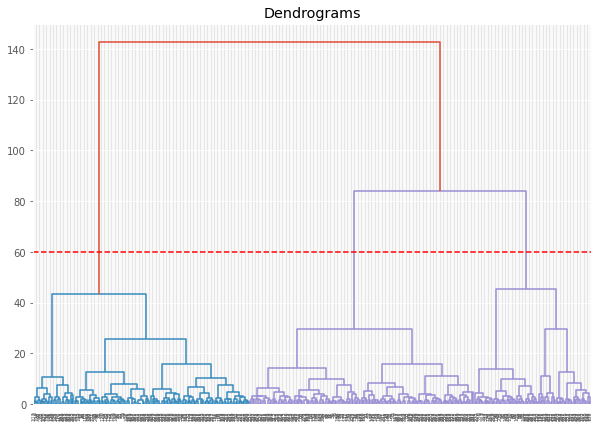

In [125]:
#Linkage Matrix
hc_data = maths_data[['G1','G2','G3','sex','age']]
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = hc.dendrogram(hc.linkage(hc_data, method='ward'));
plt.axhline(y=60, color='r', linestyle='--');